In [ ]:
# --- CSS STYLE ---
from IPython.core.display import HTML
def css_styling():
    styles = open("../input/2020-cost-of-living/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #226D28"><b>✅ Load Green palette </b></p>

In [ ]:
import seaborn as sns

In [ ]:
sns.color_palette("Greens",  as_cmap=True)

In [ ]:
Greens_palette = sns.color_palette("Greens", 20)
sns.palplot(Greens_palette)

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Introduction</b> 🍀

<center><img src="https://junpyopark.github.io/assets/img/sentiment.png"/ width="800" height="700" ></center>


<div class="alert success-alert">
✔ <b>General information about competitions : </b>

<br>In this competition, we must predict whether phrases such as **"Myridiculous dog is amazing"** will have a positive or negative effect.
Various NLP frameworks exist, such as BERT, to make these predictions.
My notebook will introduce **basic and common data clearing methods to help predict NLP models.**
I will also write modeling using RoBERTa, so please look forward to it!
</div>

<div class="alert success-alert">
✔ <b>Understanding evaluation metrics : What's a jacquard? : </b>

<br>Let's say there are two sets, A and B. An intersection is a set of elements that are common in two sets. That is, **the idea of jacquard similarity is that if we find the ratio of the intersection in the union, we can find the similarity of the two sets A and B.**
Jacquard similarity has a value **between 0 and 1**, if two sets are equal, a value of 1, and if there are no common elements in both sets, a value of 0. When J is the function to obtain jacquard similarity, the jacquard similarity function J is shown below

<center>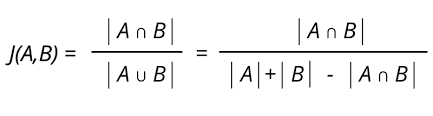</center>

</div>





<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Let me understand through a simple example </b></p>

In [ ]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

print(jaccard(doc1, doc2))

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>There are two words that appear in both document 1 and 2 in total: banana and apple. Now dividing the number of intersections by the number of assemblies calculates the jacquard similarity.</b></div>

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Table of Contents</b> 🍀

<div class="alert success-alert">
    
✔ <b>Importing Neccesary Packages</b><br><br>

i)  Most basic stuff for EDA, packages for text processing, Libraries for text preprocessing<br><br>
  
ii) We will import basic libraries for data discovery and packages for the Bert model<br><br>
  
✔ <b>Road Data</b><br><br>

i)  We will need train.csv, test.csv<br><br>
    
ii) These include text ID, text, sentiment, selected_text columns that can predict sentiment<br><br>
    
✔ <b>EDA</b><br><br>

i)  We will see how target values are distributed according to sentiment<br><br>
    
ii) Let's look at the train and test data set in general<br><br>
    
✔ <b>Cleaning Data</b><br><br>

i)  Check for missing values, Removed urls, emojis and punctuations, Removed stopwords etc.<br><br>

ii) We proceed with data preprocessing for accurate predictive models<br><br>
    
✔ <b>Visualizing the Data</b><br><br>

i)  Tweet Lengths, Word Lengths, Word Counts, Most Common Words<br><br>
    
ii) Increase overall understanding of data through visualization<br><br>
    
✔ <b>N-gram Analysis</b><br><br>

i)  An approach that considers only a few words and a sequence data representation approach<br><br>
    
ii) Let's adjust n in n-gram and look at the changes<br><br>
    
✔ <b>Wordclouds</b><br><br>
    
✔ <b>Modelling using RoBERTa</b><br><br>
 
✔ <b>References</b>
</div>

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Data and Packages Improts</b> 🍀

In [ ]:
# Most basic stuff for EDA.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading some sklearn packaces for modelling.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Some packages for word clouds and NER.

from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
import en_core_web_sm

# Core packages for general use throughout the notebook.

import os
import random
import warnings
import time
import datetime
from tqdm.autonotebook import tqdm

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches


# Setting some options for general use.

stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')

# Modelling Packages

import torch
from torch import nn
import torch.nn.functional as F 
import torch.optim as optim
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
import transformers
import tokenizers
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from tokenizers import ByteLevelBPETokenizer
from transformers import RobertaModel, RobertaConfig
from torch.utils.data import Dataset, DataLoader

from transformers import logging
logging.set_verbosity_warning()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('../input/tweet-sentiment-extraction/train.csv')
test = pd.read_csv('../input/tweet-sentiment-extraction/test.csv')

In [ ]:
# Taking general look at the both datasets.

display(train.sample(3))
display(test.sample(3))

In [ ]:
# Checking observation and feature numbers for train and test data.

print(train.shape)
print(test.shape)

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>The train and test data sets each have 4, 3 features, 2,7481 for train and 3,534 for test.</b></div>

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Exploratory Data Analysis</b> 🍀

In [ ]:
# Displaying target distribution.

Greens_palette_3 = sns.color_palette("Greens", 3)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), dpi=100)
sns.countplot(train['sentiment'],palette = Greens_palette_3, ax=axes[0])
axes[1].pie(train['sentiment'].value_counts(),
            labels=['neutral', 'positive', 'negative'],
            autopct='%1.2f%%',
            shadow=True,
            colors = Greens_palette_3,
            explode=(0.05, 0.05, 0.05),
            startangle=60)
fig.suptitle('Twitter sentiment Extaction in Train', fontsize=20)
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), dpi=100)
sns.countplot(test['sentiment'],palette = Greens_palette_3,ax=axes[0])
axes[1].pie(test['sentiment'].value_counts(),
            labels=['neutral', 'positive', 'negative'],
            autopct='%1.2f%%',
            shadow=True,
            colors = Greens_palette_3,
            explode=(0.05, 0.05, 0.05),
            startangle=60)
fig.suptitle('Twitter sentiment Extaction in Test', fontsize=20)
plt.show()

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Data Cleaning</b> 🍀

<p style="font-family:Comic Sans MS; font-size:130%; color: #008d62; text-align:center;"><b>Before visualizing the data through the basic Data Cleaning process, we will optimize it for 
analysis purposes.</b></p>
<br><br>
 
<div class="alert success-alert">
    
✔ <b>The basic order is as follows : </b>
    
* Check for missing values

* Removed urls, emojis and punctuations

* Tokenized base text and selected_text

* Lower cased clean text

* Removed stopwords

* Applied part of speech tags

* Converted part of speeches to wordnet format

* Applying word lemmatizer

* Converted tokenized text to string again
    
</div>

In [ ]:
# Check for missing values

train.isnull().value_counts(), test.isnull().value_counts()

In [ ]:
# Remove missing values

train.dropna(inplace=True)

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>One NAN exists in train data. Therefore, it removes it.</b></div>

In [ ]:
# Some basic helper functions to clean text by punctuations.

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

def remove_comma(readData):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
    return text

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions (train Text)

train['text_clean'] = train['text'].apply(lambda x: remove_URL(x))
train['text_clean'] = train['text_clean'].apply(lambda x: remove_punct(x))
train['text_clean'] = train['text_clean'].apply(lambda x: remove_html(x))
train['text_clean'] = train['text_clean'].apply(lambda x: remove_emoji(x))
train['text_clean'] = train['text_clean'].apply(lambda x: remove_comma(x))                     

# Applying helper functions (train Selected Text)

train['ST_clean'] = train['selected_text'].apply(lambda x: remove_URL(x))
train['ST_clean'] = train['ST_clean'].apply(lambda x: remove_punct(x))
train['ST_clean'] = train['ST_clean'].apply(lambda x: remove_html(x))
train['ST_clean'] = train['ST_clean'].apply(lambda x: remove_emoji(x))
train['ST_clean'] = train['ST_clean'].apply(lambda x: remove_comma(x))

# Applying helper functions (test Text)

test['text_clean'] = test['text'].apply(lambda x: remove_URL(x))
test['text_clean'] = test['text_clean'].apply(lambda x: remove_punct(x))
test['text_clean'] = test['text_clean'].apply(lambda x: remove_html(x))
test['text_clean'] = test['text_clean'].apply(lambda x: remove_emoji(x))
test['text_clean'] = test['text_clean'].apply(lambda x: remove_comma(x))      

In [ ]:
train.head()

In [ ]:
test.head()

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>You can see that emoji, url, etc. has been erased well.</b></div>

In [ ]:
# Tokenizing the tweet base texts.

train['tokenized_text'] = train['text_clean'].apply(word_tokenize)
train['tokenized_ST'] = train['ST_clean'].apply(word_tokenize)
test['tokenized_text'] = test['text_clean'].apply(word_tokenize)
display(train.sample(5))
display(test.sample(5))

In [ ]:
# Lower casing clean text.

train['lower_text'] = train['tokenized_text'].apply(
    lambda x: [word.lower() for word in x])

train['lower_ST'] = train['tokenized_ST'].apply(
    lambda x: [word.lower() for word in x])

test['lower_text'] = test['tokenized_text'].apply(
    lambda x: [word.lower() for word in x])

display(train.sample(3))
display(test.sample(3))

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Why should I lower? </b></p>

><div class="alert success-alert" role="alert">✔ <b>This is because words can be saved by changing them to lowercase letters and reducing the number of words through subsequent processes.</b></div>

In [ ]:
# Removing stopwords.

train['stopwords_removed_text'] = train['lower_text'].apply(
    lambda x: [word for word in x if word not in stop])

train['stopwords_removed_ST'] = train['lower_ST'].apply(
    lambda x: [word for word in x if word not in stop])

test['stopwords_removed_text'] = test['lower_text'].apply(
    lambda x: [word for word in x if word not in stop])

display(train.sample(3))
display(test.sample(3))

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ What is Part-of-speech Tagging ? </b></p>

><div class="alert success-alert" role="alert">✔ <b>It refers to identifying and tagging the parts of the words in a sentence. It is output in the form of a tuple, and is output in the form of a (word, tag). where tags are POS tags.</b></div>

<br><br>

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ The types of Part-of-speech Tag are shown in the table below : </b></p>

<center><img src="https://mblogthumb-phinf.pstatic.net/MjAyMDA0MDZfMTUz/MDAxNTg2MTQzOTE2MDc3._q5jz1Y50qyH23mv5VsU_Vz_s6At_CnVQl-HbyL873wg.Bk1q6ZSCUOJ5rxy5yZGBKTaBpnVbnPdvu_A3a1vyzfEg.PNG.bycho211/1.png?type=w800"/ width="500" height="700" ></center>

In [ ]:
# Applying part of speech tags.

train['pos_tags_text'] = train['stopwords_removed_text'].apply(nltk.tag.pos_tag)
train['pos_tags_ST'] = train['stopwords_removed_ST'].apply(nltk.tag.pos_tag)
test['pos_tags_text'] = test['stopwords_removed_text'].apply(nltk.tag.pos_tag)

display(train.sample(3))
display(test.sample(3))

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Why change to Wordnet format ? </b></p>

><div class="alert success-alert" role="alert">✔ <b>Wordnet is an ontology built by Princeton University about English words in the past, which outlines how they relate to each other. Rather than organizing individual meanings by word like a dictionary, organizing them around the relationship between words can increase their utilization.</b></div>

In [ ]:
# Converting part of speeches to wordnet format.

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


train['wordnet_pos_text'] = train['pos_tags_text'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

train['wordnet_pos_ST'] = train['pos_tags_ST'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

test['wordnet_pos_text'] = test['pos_tags_text'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

display(train.sample(3))
display(test.sample(3))

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Let's find out about Lemmatizing ! </b></p>

><div class="alert success-alert" role="alert">✔ <b>First of all, Stemming and Lemmatizing, which we commonly know, are similar, but there is a big difference.</b></div>

<br>

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgUAJcKqcD-WlJa3rz6-5FInyAG_EpoXxHIQ&usqp=CAU"/ ></center>

<br>
<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>Stemming sometimes creates words that do not exist, and Lemmatizing sometimes creates words that do exist.That's what it's like.</b></div>

<br>

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Conclusion</b></p>

><div class="alert success-alert" role="alert">✔ <b>In summary, both Stemming and Lemmatizing are root extractions, which can be extracted from the dictionary, and Lemma can be extracted from the dictionary.</b></div>

In [ ]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

train['lemmatized_text'] = train['wordnet_pos_text'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

train['lemmatized_text'] = train['lemmatized_text'].apply(
    lambda x: [word for word in x if word not in stop])

train['lemma_str_text'] = [' '.join(map(str, l)) for l in train['lemmatized_text']]

train['lemmatized_ST'] = train['wordnet_pos_ST'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

train['lemmatized_ST'] = train['lemmatized_ST'].apply(
    lambda x: [word for word in x if word not in stop])

train['lemmatized_str_ST'] = [' '.join(map(str, l)) for l in train['lemmatized_ST']]

test['lemmatized_text'] = test['wordnet_pos_text'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

test['lemmatized_text'] = test['lemmatized_text'].apply(
    lambda x: [word for word in x if word not in stop])

test['lemma_str_text'] = [' '.join(map(str, l)) for l in test['lemmatized_text']]

display(train.sample(3))
display(test.sample(3))

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>All right! The data is complete as we wish. Now let's look at the visualization to see what insights are hidden.</b></div>

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Visualizing the Data</b> 🍀

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Tweet Lengths </b>

In [ ]:
# Creating a new feature for the visualization.
# text_clean Lengths visualization.
train['Character Count'] = train['text_clean'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[:2, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#008d62')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[2:, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#008d62')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(y=feature, data=df, ax=ax3, color='#008d62')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=20))

    plt.suptitle(f'{title}', fontsize=24)

# Greens_palette_3 = sns.color_palette("Greens", 3)
# sns.palplot(Greens_palette_3)

In [ ]:
plot_dist3(train[train['sentiment'] == 'positive'], 'Character Count',
           'Characters Per "positive" Tweet')

In [ ]:
plot_dist3(train[train['sentiment'] == 'neutral'], 'Character Count',
           'Characters Per "neutral" Tweet')

In [ ]:
plot_dist3(train[train['sentiment'] == 'negative'], 'Character Count',
           'Characters Per "negative" Tweet')

In [ ]:
# ST_clean Lengths visualization.

train['Character Count ST'] = train['ST_clean'].apply(lambda x: len(str(x)))

In [ ]:
plot_dist3(train[train['sentiment'] == 'positive'], 'Character Count ST',
           'Characters Per "positive" Tweet')

In [ ]:
plot_dist3(train[train['sentiment'] == 'neutral'], 'Character Count ST',
           'Characters Per "neutral" Tweet')

In [ ]:
plot_dist3(train[train['sentiment'] == 'negative'], 'Character Count ST',
           'Characters Per "negative" Tweet')

In [ ]:
# Test data : text_clean Lengths visualization.

test['Character Count'] = test['text_clean'].apply(lambda x: len(str(x)))

In [ ]:
plot_dist3(test[test['sentiment'] == 'positive'], 'Character Count',
           'Characters Per "positive" Tweet')

In [ ]:
plot_dist3(test[test['sentiment'] == 'neutral'], 'Character Count',
           'Characters Per "neutral" Tweet')

In [ ]:
plot_dist3(test[test['sentiment'] == 'negative'], 'Character Count',
           'Characters Per "negative" Tweet')

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>Both train and test show similar distributions in positive, neutral, and negative.</b></div>

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Word Counts </b>

In [ ]:
def plot_word_number_histogram(textne, textpo, textng):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textne.str.split().map(lambda x: len(x)), ax=axes[0], color='#008d62')
    sns.distplot(textpo.str.split().map(lambda x: len(x)), ax=axes[1], color='#008d62')
    sns.distplot(textng.str.split().map(lambda x: len(x)), ax=axes[2], color='#008d62')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('neutral')
    axes[0].set_title('Reliable')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('positive')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('negative')
    
    fig.suptitle('Punctuations in tweets', fontsize=24, va='baseline')
    
    fig.tight_layout()

In [ ]:
plot_word_number_histogram(train[train['sentiment'] == 'neutral']['text'],
                           train[train['sentiment'] == 'positive']['text'],
                           train[train['sentiment'] == 'negative']['text'])

In [ ]:
plot_word_number_histogram(train[train['sentiment'] == 'neutral']['selected_text'],
                           train[train['sentiment'] == 'positive']['selected_text'],
                           train[train['sentiment'] == 'negative']['selected_text'])

In [ ]:
plot_word_number_histogram(test[test['sentiment'] == 'neutral']['text'],
                           test[test['sentiment'] == 'positive']['text'],
                           test[test['sentiment'] == 'negative']['text'])

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Word Lengths </b>

In [ ]:
def plot_word_len_histogram(textne, textpo, textng):
    
    """A function for comparing average word length"""
    
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textne.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[0], color='#008d62')
    sns.distplot(textpo.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[1], color='#008d62')
    sns.distplot(textng.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[2], color='#008d62')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('neutral')
    axes[0].set_title('Reliable')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('positive')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('negative')
    
    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()

In [ ]:
plot_word_len_histogram(train[train['sentiment'] == 'neutral']['text'],
                        train[train['sentiment'] == 'positive']['text'],
                        train[train['sentiment'] == 'negative']['text'])

In [ ]:
plot_word_len_histogram(train[train['sentiment'] == 'neutral']['selected_text'],
                        train[train['sentiment'] == 'positive']['selected_text'],
                        train[train['sentiment'] == 'negative']['selected_text'])

In [ ]:
plot_word_len_histogram(test[test['sentiment'] == 'neutral']['text'],
                        test[test['sentiment'] == 'positive']['text'],
                        test[test['sentiment'] == 'negative']['text'])

In [ ]:
lis = [
    train[train['sentiment'] == 'neutral']['lemma_str_text'],
    train[train['sentiment'] == 'positive']['lemma_str_text'],
    train[train['sentiment'] == 'negative']['lemma_str_text']
]

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>In Word counts, train and test show skwness.</b></div>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1

        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: 'Stopword', 1: 'Count'})
        sns.barplot(x='Count', y='Stopword', data=df, palette='plasma', ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print('No stopwords left in texts.')
        break

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>N-gram Analysis</b> 🍀

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Most Common Words </b>

In [ ]:
# Displaying most common words in train data.


fig, axes = plt.subplots(1, 3, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette= Greens_palette[::-1], ax=j)
axes[0].set_title('neutral in Tweets')
axes[1].set_title('positive in Tweets')
axes[2].set_title('negative in Tweets')

axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Word')

fig.suptitle('Most Common Unigrams TOP 20 in train data', fontsize=24, va='baseline')
plt.tight_layout()



# Displaying most common words in test data.

lis_test = [
    test[test['sentiment'] == 'neutral']['lemma_str_text'],
    test[test['sentiment'] == 'positive']['lemma_str_text'],
    test[test['sentiment'] == 'negative']['lemma_str_text']
]

fig, axes = plt.subplots(1, 3, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_test, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette= Greens_palette[::-1], ax=j)
axes[0].set_title('neutral in Tweets')
axes[1].set_title('positive in Tweets')
axes[2].set_title('negative in Tweets')

axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Word')

fig.suptitle('Most Common Unigrams TOP 20 in test data', fontsize=24, va='baseline')
plt.tight_layout()

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>Twenty Most Common Words appear similar in train and test.</b></div>

In [ ]:
def ngrams(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette= Greens_palette[::-1], ax=j)
        axes[0].set_title('neutral in Tweets')
        axes[1].set_title('positive in Tweets')
        axes[2].set_title('negative in Tweets')
        
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        axes[2].set_xlabel('Count')
        axes[2].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()
        
        
def ngrams_test(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis_test, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette= Greens_palette[::-1], ax=j)
        axes[0].set_title('neutral in Tweets')
        axes[1].set_title('positive in Tweets')
        axes[2].set_title('negative in Tweets')
        
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        axes[2].set_xlabel('Count')
        axes[2].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Most Common Bigrams </b>

In [ ]:
ngrams(2, 'Most Common Bigrams in train')
ngrams_test(2, 'Most Common Bigrams in test')

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Most Common Trigram </b>

In [ ]:
ngrams(3, 'Most Common Trigrams in train')
ngrams_test(3, 'Most Common Bigrams in test')

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>In Bigrams and Trigrams, too, train and test had similar results.</b></div>

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Word Cloud</b> 🍀

In [ ]:
mask = np.array(Image.open('../input/masksforwordclouds/twitter_mask3.jpg'))

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(24,12))
sentiment_list = np.unique(train['sentiment'])

for i, sentiment in zip(range(3), sentiment_list):
    wc = WordCloud(background_color="white", max_words = 2000, width = 1600, height = 800, mask=mask, colormap="Greens").generate(" ".join(train[train['sentiment']==sentiment]['lemma_str_text']))
    
    axes[i].text(0.5,1, "{} text".format(sentiment), fontweight="bold", fontfamily='serif', fontsize=17)
    axes[i].patch.set_alpha(0)
    axes[i].axis('off')
    axes[i].imshow(wc)

fig.text(0.3,0.8,"WordCloud by sentiment per selected text in train Tweets", fontweight="bold", fontfamily='serif', fontsize=22)
plt.show()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(24,12))
sentiment_list = np.unique(test['sentiment'])

for i, sentiment in zip(range(3), sentiment_list):
    wc = WordCloud(background_color="white", max_words = 2000, width = 1600, height = 800, mask=mask, colormap="Greens").generate(" ".join(test[test['sentiment']==sentiment]['lemma_str_text']))
    
    axes[i].text(0.5,1, "{} text".format(sentiment), fontweight="bold", fontfamily='serif', fontsize=17)
    axes[i].patch.set_alpha(0)
    axes[i].axis('off')
    axes[i].imshow(wc)

fig.text(0.3,0.8,"WordCloud by sentiment per selected text in test Tweets", fontweight="bold", fontfamily='serif', fontsize=22)
plt.show()

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>Insights</b></p>

><div class="alert success-alert" role="alert">✔ <b>Word Cloud provides pretentious information.</b><br><br> ✔ <b>We see the need for the elimination of words in train and test that negatively affect the analysis such as 'im', 'u'.</b><br></div>

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Modelling using RoBERTa</b> 🍀

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ What is RoBERTa ? </b>
    
><div class="alert success-alert" role="alert">✔ <b>By adjusting the hyperparameters and learning data sizes of BERT, we are a model that shows the performance of post-BERT as well as that of post-BERT, which is comparable to that of post-BERT, or much better. In particular, RoBERTa demonstrates that by rebuilding BERT like this, the masked language model alone is sufficiently capable of competing with autoregressive language modeling such as XLNet.</b></div>

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ What is the difference between BERT and RoBERTa? </b>
    
><div class="alert success-alert" role="alert">✔ <b>Learning with longer, larger batch with more data</b><br><br>✔ <b>Remove next sentence prediction objective</b><br><br>✔ <b>Learning with longer sequences</b><br><br>✔ <b>Change masking dynamically</b></div>

<center><img src="https://vanche.github.io/assets/images/roberta_spanbert/roberta.png"/ width="700" height="500" ></center>

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Feature Selection </b>
    
><div class="alert success-alert" role="alert">✔ <b>Our EDA work was meaningful enough, but we decided to use existing 'text', 'selected_text' and 'sentiment' to find the output we wanted in the competition.</b></div>

In [ ]:
# Train
train_df = train[['textID','text','selected_text','sentiment']]
train_df['text'] = train_df['text'].astype(str)
train_df['selected_text'] = train_df['selected_text'].astype(str)

# Test
test_df = test[['textID','text','sentiment']]
test_df['text'] = test_df['text'].astype(str)

In [ ]:
train_df.head(3)

In [ ]:
test_df.head(3)

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Seed Setting </b>

In [ ]:
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.  
    
    device = torch.device('cuda')    


    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')

In [ ]:
def set_seed(seed):
    # Set random seed for reproducibility
    
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = True
        
seed = 777
set_seed(seed)

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Data Loader </b>

In [ ]:
MAX_LENGTH = 100
TRAIN_BATCH_SIZE = 32
TEST_BATCH_SIZE = 16
EPOCHS = 10

In [ ]:
PATH = "../input/roberta-base"

tokenizer = ByteLevelBPETokenizer(
            vocab = f'{PATH}/vocab.json', 
            merges= f'{PATH}/merges.txt', 
            add_prefix_space = True,
            lowercase=True)

tokenizer.enable_truncation(max_length=512)


class TextDataset(Dataset):
    
    def __init__(self, df, tokenizer, max_length):
        #data loading
        self.df = df
        self.selected_text = "selected_text" in df
        self.tokenizer = tokenizer
        self.max_length = MAX_LENGTH
        
    def __len__(self):
        #len(dataset) i.e., the total number of samples
        return len(self.df)

    
    def get_data(self, row):
        #processing the data
        text = " "+" ".join(row.text.lower().split()) # clean the text
        encoded_input = self.tokenizer.encode(text) # the sentence to be encoded
        
        sentiment_id = {
                'positive': 1313,
                'negative': 2430,
                'neutral': 7974
            }  # stating the ids of the sentiment values 
        
        #print ([list((i, encoded_input[i])) for i in range(len(encoded_input))])

        
        input_ids = [101] + [sentiment_id[row.sentiment]] + [102] + encoded_input.ids + [102]
                 
        #ID offsets       
        offsets = [(0, 0)] * 3 + encoded_input.offsets + [(0, 0)]  # since first 3 are [CLS] ...sentiment tokens... [SEP]
        
        
        pad_len = self.max_length - len(input_ids)    
        if pad_len > 0:
            input_ids += ([0] * pad_len)
            offsets += ([(0, 0)] * pad_len)
                       
        input_ids = torch.tensor(input_ids, dtype=torch.long)
        
        # The mask has 1 for real tokens and 0 for padding tokens. Only real tokens are attended to.
        masks = torch.where(input_ids != 0, torch.tensor(1), torch.tensor(0))  
        
        masks = torch.tensor(masks, dtype=torch.long)
        offsets = torch.tensor(offsets, dtype=torch.long)
                
        return input_ids, masks, text, offsets
    
    def get_target_ids(self, row, text, offsets):
        # preparing data only for the training
        selected_text = " " + " ".join(row.selected_text.lower().split())

        string_len = len(selected_text) - 1
        
        idx0 = None
        idx1 = None
            
        for ind in (position for position, line in enumerate(text) if line == selected_text[1]):
            if " " + text[ind: ind+string_len] == selected_text:
                idx0 = ind
                idx1 = ind + string_len - 1
                break
                
        char_targets = [0] * len(text)
        if idx0 != None and idx1 != None:
            for ct in range(idx0, idx1 + 1):
                char_targets[ct] = 1
                
        # Start and end tokens
        target_idx = []
        for k, (offset1, offset2) in enumerate(offsets):
            if sum(char_targets[offset1: offset2]) > 0:
                try:
                    target_idx.append(k)
                except:
                    continue

        targets_start = target_idx[0]
        targets_end = target_idx[-1]
                
        return selected_text, targets_start, targets_end
    
   
    
    def __getitem__(self, index): 
        
        # addressing each row by its index
        # dataset[index] i.e., generates one sample of data
        data = {}
        row = self.df.iloc[index]
        
        ids, masks, text, offsets = self.get_data(row)
        data['ids'] = ids
        data['masks'] = masks
        data['text'] = text
        data['offsets'] = offsets
        data['sentiment'] = row.sentiment
        
        if self.selected_text:   
            # checking if selected text exists
            # This part only exists in the training
            selected_text,start_index, end_index = self.get_target_ids(row, text, offsets)
            data['start_index'] = start_index
            data['end_index'] = end_index
            data['selected_text'] = selected_text
                
        return data

In [ ]:
e = TextDataset(train_df, tokenizer, MAX_LENGTH)
e[1]

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Modelling </b>

In [ ]:
class TextModel(nn.Module):
     
    def __init__(self):
        super(TextModel, self).__init__()
        
        # RoBERTa encoder 
        config = RobertaConfig.from_pretrained(
            '../input/roberta-base/config.json', output_hidden_states=True)    
        self.roberta = RobertaModel.from_pretrained(
            '../input/roberta-base/pytorch_model.bin', config=config)

        for param in self.roberta.parameters():
            param.requires_grad = True
    
        self.drop0 = nn.Dropout(0.5)
        self.l0 = nn.Linear(config.hidden_size * 2,config.hidden_size) 
        # Multiplied by 2 since the forward pass concatenates the last two hidden representation layers
        
        self.drop1 = nn.Dropout(config.hidden_dropout_prob)
        self.l1 = nn.Linear(config.hidden_size, 2) 
        # The output will have two dimensions- start and end logits
        
        torch.nn.init.normal_(self.l0.weight, std=0.02)
        torch.nn.init.normal_(self.l0.bias, 0)
        
    def forward(self, ids, masks): 
        # token_type_ids
        # Return the hidden states from the RoBERTa backbone
        # Type: torch tensor
        last_hidden_state, pooled_output, hidden_states = self.roberta(input_ids=ids, attention_mask=masks, return_dict=False)
        
        # input_ids.shape and attention_mask.shape both will be of the size (batch size x seq length)
        # print(last_hidden_state.shape) : torch.Size([24, 100, 768])
        # But why 768? 
        # This is the number of hidden units in the feedforward-networks. We can verify that by checking the config.
        # Concatenate the last two hidden states
        out = torch.cat((hidden_states[-1], hidden_states[-2]), dim=-1)   
        # out = torch.mean(out, 0) # take the mean along axis 0
        
        # adding dropouts and linear layers
        out = self.drop0(out)
        out = F.relu(self.l0(out))
        out = self.drop1(out) 
        out = self.l1(out) 
        
        # splitting the tensor into two logits 
        start_logits, end_logits = out.split(1, dim=-1)
        
        # dimension along which to split the tensor.
        # Return a tensor with all the dimensions of input of size 1 removed, for both the logits.
        start_logits = start_logits.squeeze()  
        
        # Squeezing a tensor removes the dimensions or axes that have a length of one
        end_logits = end_logits.squeeze() 
        
        return start_logits, end_logits

# Training and validation dataloaders
def train_val_dataloaders(df, train_idx, val_idx, batch_size):
    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    train_loader = torch.utils.data.DataLoader(
        TextDataset(train_df, tokenizer, MAX_LENGTH), 
        batch_size=batch_size, 
        shuffle=True, 
        num_workers=0,   # to avoid multi-process, keep it at 0
        drop_last=True)

    val_loader = torch.utils.data.DataLoader(
        TextDataset(val_df, tokenizer, MAX_LENGTH),
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0)

    dataloaders_dict = {"train": train_loader, "val": val_loader}

    return dataloaders_dict

# Test dataloader
def test_loader(df, batch_size=TEST_BATCH_SIZE):
    loader = torch.utils.data.DataLoader(
        TextDataset(test_df, tokenizer, MAX_LENGTH), 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0)    
    return loader

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Loss Function </b>

In [ ]:
def loss_function(start_logits, end_logits, start_positions, end_positions):
    ce_loss = nn.CrossEntropyLoss()
    start_loss = ce_loss(start_logits, start_positions)
    end_loss = ce_loss(end_logits, end_positions)    
    total_loss = start_loss + end_loss
    return total_loss

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Evaluation Function</b>

In [ ]:
def get_selected_text(text, start_idx, end_idx, offsets):
    selected_text = ""
    for ix in range(start_idx, end_idx + 1):
        selected_text += text[offsets[ix][0]: offsets[ix][1]]
        if (ix + 1) < len(offsets) and offsets[ix][1] < offsets[ix + 1][0]:
            selected_text += " "
    return selected_text

def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


def find_jaccard_score(text, selected_text, sentiment, offsets, start_logits, end_logits): #start_idx, end_idx
    start_pred = np.argmax(start_logits) # Predicted start index using argmax
    end_pred = np.argmax(end_logits) # Predicted end index using argmax
    if (end_pred <= start_pred) or sentiment == 'neutral' or len(text.split()) < 2:
        enc = tokenizer.encode(text)
        prediction = tokenizer.decode(enc.ids[start_pred-1:end_pred])   
    else:
        prediction = get_selected_text(text, start_pred, end_pred, offsets)
    true = selected_text
    
    return jaccard(true, prediction), prediction

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Training Function</b>

In [ ]:
train_loss = []
val_loss = []
jac_train = []
jac_val = []

def TrainModel(model, dataloaders_dict, optimizer, num_epochs, scheduler, device, filename): 

    # Set device as `cuda` (GPU)
    model.to(device)
    
    for epoch in range(num_epochs):
        for key in ['train', 'val']:
            if key == 'train':
                model.train()
                dataloaders = dataloaders_dict['train']
            else:
                model.eval()
                dataloaders = dataloaders_dict['val']

            epoch_loss = 0.0
            epoch_jaccard = 0.0
            
            # Set tqdm to add loading screen and set the length
            loader = tqdm(dataloaders, total=len(dataloaders))
            #print(len(dataloaders))
                        
            # loop over the data iterator, and feed the inputs to the network
            # Train the model on each batch
            for (idx, data) in enumerate(loader):
                ids = data['ids']
                masks = data['masks']
                text = data['text']
                offsets = data['offsets'].numpy()
                start_idx = data['start_index']
                end_idx = data['end_index']
                sentiment = data['sentiment']

                model.zero_grad()
                optimizer.zero_grad()
                
                ids = ids.to(device, dtype=torch.long)
                masks = masks.to(device, dtype=torch.long)
                start_idx = start_idx.to(device, dtype=torch.long)
                end_idx = end_idx.to(device, dtype=torch.long)

                with torch.set_grad_enabled(key == 'train'): 

                    start_logits, end_logits = model(ids, masks) 
                    
                    loss = loss_function(start_logits, end_logits, start_idx, end_idx)
                    
                    if key == 'train':
                        if idx != 0: 
                            loss.backward() # Perform a backward pass to calculate the gradients
                        optimizer.step() # Update parameters and take a step using the computed gradient
                        scheduler.step() # Update learning rate schedule                        
                        
                        # Clip the norm of the gradients to 1.0.
                        # This is to help prevent the "exploding gradients" problem.
                        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  
                        
                    epoch_loss += loss.item() * len(ids)
                    
                    # Move logits to CPU
                    # detaching these outputs so that the backward passes stop at this point
                    start_idx = start_idx.cpu().detach().numpy()
                    end_idx = end_idx.cpu().detach().numpy()
                    start_logits = torch.softmax(start_logits, dim=1).cpu().detach().numpy()
                    end_logits = torch.softmax(end_logits, dim=1).cpu().detach().numpy()
                    
                    selected_text = data['selected_text']
                    
                    filtered_sentences = []
                    for i, t_data in enumerate(text):                 
                        jaccard_score, filtered_output = find_jaccard_score(
                            t_data,
                            selected_text[i],
                            sentiment[i],
                            offsets[i],
                            start_logits[i], 
                            end_logits[i])
                        epoch_jaccard += jaccard_score
                        filtered_sentences.append(filtered_output)
            
            # Calculate the average loss over the training data
            epoch_loss = epoch_loss / len(dataloaders.dataset)
            # Calculate the average jaccard score over the training data
            epoch_jaccard = epoch_jaccard / len(dataloaders.dataset)
            
            print('Epoch {}/{} | {:^5} | Loss: {:.4f} | Jaccard: {:.4f}'.format(
                epoch + 1, num_epochs, key, epoch_loss, epoch_jaccard))
            
            # Store the loss value for plotting the learning curve.
            if key == 'train':
                train_loss.append(epoch_loss)
                jac_train.append(epoch_jaccard)
                
            else:
                val_loss.append(epoch_loss)
                jac_val.append(epoch_jaccard)
    
    torch.save(model.state_dict(), filename)

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Training</b>

In [ ]:
skf = StratifiedKFold(n_splits=3,shuffle=True,random_state=seed)

In [ ]:
for fold, (idxTrain, idxVal) in enumerate(skf.split(train_df, train_df.sentiment), start=1):
    
    print('#'*10)
    print('# FOLD %i #'%(fold))
    print('#'*10)
    
    model = TextModel()
    optimizer = AdamW(model.parameters(), lr=3e-5, weight_decay=0.01, correct_bias=False)
    dataloaders_dict = train_val_dataloaders(train_df, idxTrain, idxVal, batch_size=TRAIN_BATCH_SIZE)
    num_training_steps = int(len(train_df) / EPOCHS * TRAIN_BATCH_SIZE)
    
    # default #use a linear scheduler with no warmup steps
    scheduler = get_linear_schedule_with_warmup(
                  optimizer,
                  num_warmup_steps=0, 
                  num_training_steps=num_training_steps
                )    
    TrainModel(
        model, 
        dataloaders_dict, 
        optimizer, 
        EPOCHS,
        scheduler,
        device,
        f'bert_fold{fold}.pth')

<p style="font-family: Comic Sans MS; line-height: 1;font-size: 20px; letter-spacing: 1px;  color: #008d62"><b>✅ Inference</b>

In [ ]:
%%time

t_loader = test_loader(test_df)
predictions = []
models = []
for fold in range(skf.n_splits):
    model = TextModel()
    model.to(device)
    model.load_state_dict(torch.load(f'./bert_fold{fold+1}.pth'))
    model.eval()
    models.append(model)

loader = tqdm(t_loader, total=len(t_loader))
for (idx, data) in enumerate(loader):
    ids = data['ids'].to(device)
    masks = data['masks'].to(device)
    text = data['text']
    offsets = data['offsets'].numpy()

    start_logits = []
    end_logits = []
    for model in models:
        with torch.no_grad():
            output = model(ids, masks)
            start_logits.append(torch.softmax(output[0], dim=1).cpu().detach().numpy())
            end_logits.append(torch.softmax(output[1], dim=1).cpu().detach().numpy())

    start_logits = np.mean(start_logits, axis=0)
    end_logits = np.mean(end_logits, axis=0)
    
    for i, t_data in enumerate(text):
        start_pred = np.argmax(start_logits[i])
        end_pred = np.argmax(end_logits[i])
        if start_pred >= end_pred:
            enc = tokenizer.encode(t_data)
            prediction = tokenizer.decode(enc.ids[start_pred-1:end_pred])
        else:
            prediction = get_selected_text(t_data, start_pred, end_pred, offsets[i])
        predictions.append(prediction)

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Submission</b> 🍀

In [ ]:
sub_df = pd.read_csv('../input/tweet-sentiment-extraction/sample_submission.csv')
sub_df['selected_text'] = predictions
# post-processing trick
sub_df['selected_text'] = sub_df['selected_text'].apply(lambda x: x.replace('!!!!', '!') if len(x.split())==1 else x)
sub_df['selected_text'] = sub_df['selected_text'].apply(lambda x: x.replace('..', '.') if len(x.split())==1 else x)
sub_df['selected_text'] = sub_df['selected_text'].apply(lambda x: x.replace('...', '.') if len(x.split())==1 else x)
sub_df[['textID','selected_text']].to_csv('submission.csv',index=False)
pd.set_option('max_colwidth', 60)

sub_df.sample(10)

# <p style="background-color:#008d62 ; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>References</b> 🍀
    
<div class="alert success-alert"><b>
✔ https://www.kaggle.com/abhishek/roberta-inference-5-folds/data <br><br>
✔ https://www.kaggle.com/shoheiazuma/tweet-sentiment-roberta-pytorch <br><br>
✔ https://www.kaggle.com/aditidutta/tweet-sentiment-extraction-pytorch <br><br>
✔ https://brunch.co.kr/@choseunghyek/7 <br><br>
✔ https://vanche.github.io/spanbert_roberta/ <b>
</div>

<p style="font-family:Comic Sans MS; font-size:180%; color: #008d62; text-align:center;"><b>Pls, "UPVOTE" if this code helped ! 👀</b></p>